In [ ]:
%cd ..
from src.utility import load_data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.utils import shuffle

from src.normalize_data import  normalize_data

def get_single_val_cols(df):
    single_value_cols = []
    length = len(df)
    for col in df.columns:
        if df[col].nunique()==length or df[col].nunique()==1:
            single_value_cols.append(col)
    return single_value_cols

: 

In [ ]:
print('hi')

: 

In [31]:
edge_ml = '/home/guru/ENViSEC/data/Edge-lloTset/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'
edge_dnn = '/home/guru/ENViSEC/data/Edge-lloTset/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv'
df_ml = pd.read_csv(edge_ml)
df_dnn = pd.read_csv(edge_dnn)

/home/guru/miniconda3/envs/envisec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3098: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/guru/miniconda3/envs/envisec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3098: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
def drop_data(df_raw):
    """
     Dropping data (Columns, duplicated rows, NAN, Null..):
     based on https://ieee-dataport.org/documents/edge-iiotset-new-comprehensive-realistic-cyber-security-dataset-iot-and-iiot-applications
    """
    drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
         "tcp.dstport", "udp.port", "mqtt.msg"]
         
    df = df_raw.drop(columns=drop_columns, axis=1)
    df = df.dropna(axis=0, how='any')
    df = df.drop_duplicates(subset=None, keep="first")
    df = shuffle(df)
    nan_dict = dict(df.isna().sum())
    nan_value_cols = [(x, nan_dict[x]) for x in nan_dict if nan_dict[x]>0]
    if nan_value_cols:
        print('Following columns has nan values: Tuple(col, num_nan_values):-')
        print(nan_value_cols)
    return df 

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

df = drop_data(df_dnn)
encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")
df = df.reset_index(drop=True)

## Shuffle before taking a portion of dataset

In [90]:
if 'index' in df.columns:
    df =df.drop(columns=['index'], axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port',
       'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type',
       'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len',
       'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'multi_label',
       'http.request.method-0.0', 'http.request.method-0',
       'http.request.method-GET', 'http.request.method-OPTIONS',
       'http.request.method-POST', 'http.request.method-PROPFIND',
       'http.request.

## Removing duplicate rows of independent variables

In [85]:
# print(len(df_final.drop(columns=['multi_label']).drop_duplicates()
def remove_dupsX(df):
    """
    remove the duplicate rows conflicting with y classes
    """
    independent_features = [col for col in list(df.columns) if col!='multi_label']
    return df.drop_duplicates(
        subset=independent_features, 
        keep=False).reset_index(drop=False)

if 'Attack_type' in df.columns:
    df = df.rename(columns={'Attack_type':'multi_label'})
print(len(df))
df = remove_dupsX(df)
print(len(df))

1924566
1924566


In [93]:
df['multi_label'] = df['multi_label'].str.replace('Normal', 'benign')
df_norm = normalize_data(df.drop(columns=['multi_label'], axis=1))
df_norm['multi_label'] = df['multi_label']
df_norm.to_csv('ENViSEC-dev/data/normalized/EdgeIIoTset.csv', index=False)

X = df_norm.drop(columns=['multi_label'], axis=1)
y = df_norm['multi_label']

Sample data:
    arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0         0.0          0.0            0.0          0.0          0.0   
1         0.0          0.0            0.0          0.0          0.0   

   http.content_length  http.response  http.tls_port   tcp.ack   tcp.ack_raw  \
0                  0.0            0.0            0.0  554390.0  2.372179e+09   
1                  0.0            0.0            0.0      15.0  3.462015e+09   

   ...  mqtt.conack.flags-1471198  mqtt.conack.flags-1471199  \
0  ...                          0                          0   
1  ...                          0                          0   

   mqtt.conack.flags-1574358  mqtt.conack.flags-1574359  mqtt.protoname-0.0  \
0                          0                          0                   0   
1                          0                          0                   0   

   mqtt.protoname-0  mqtt.protoname-MQTT  mqtt.topic-0.0  mqtt.topic-0  \
0                 1       

In [69]:
# debugging code
df_part = df.head(2000)
X = normalize_data(df_part.drop(columns=['multi_label'], axis=1))
y = df_part['multi_label']

Sample data:
    index  arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
0      0         0.0          0.0            0.0          0.0          0.0   
1      1         0.0          0.0            0.0          0.0          0.0   

   http.content_length  http.response  http.tls_port  tcp.ack  ...  \
0                  0.0            0.0            0.0      1.0  ...   
1                  0.0            0.0            0.0     15.0  ...   

   mqtt.conack.flags-1471198  mqtt.conack.flags-1471199  \
0                          0                          0   
1                          0                          0   

   mqtt.conack.flags-1574358  mqtt.conack.flags-1574359  mqtt.protoname-0.0  \
0                          0                          0                   0   
1                          0                          0                   0   

   mqtt.protoname-0  mqtt.protoname-MQTT  mqtt.topic-0.0  mqtt.topic-0  \
0                 0                    1          

In [89]:
X

,index,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,1.519169e-09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5.195979e-07,0.0,0.0,0.243587,0.615152,0.0,0.00000,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.039196e-06,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,2.531948e-10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.558794e-06,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,2.531948e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.078392e-06,0.0,0.0,0.000000,0.000000,0.0,0.00043,0.0,0.0,2.531948e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924561,9.999979e-01,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,5.685691e-05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1924562,9.999984e-01,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,3.797922e-09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1924563,9.999990e-01,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,1.417891e-08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1924564,9.999995e-01,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,2.531948e-10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


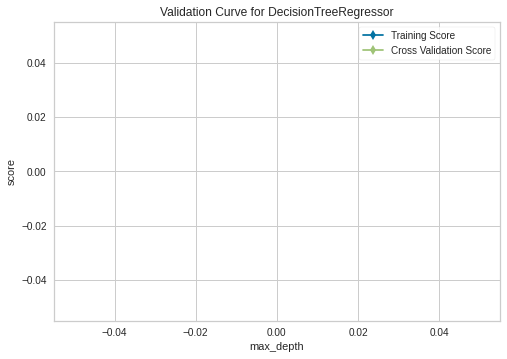

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [71]:
import numpy as np

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 50), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [77]:
df['multi_label'].str.replace('Normal', 'benign')

0             benign
1             benign
2          DDoS_ICMP
3             benign
4             benign
             ...    
1924561       benign
1924562       benign
1924563       benign
1924564       benign
1924565       benign
Name: multi_label, Length: 1924566, dtype: object

In [78]:
df['multi_label']

0             Normal
1             Normal
2          DDoS_ICMP
3             Normal
4             Normal
             ...    
1924561       Normal
1924562       Normal
1924563       Normal
1924564       Normal
1924565       Normal
Name: multi_label, Length: 1924566, dtype: object

In [11]:

def get_dataset_name(file):
    """
    returns dataset name from the input file
    """
    dt = file.rsplit('.', 1)[0].rsplit('/')
    name = dt[1] if len(dt)>0 else dt[0]
    return name

get_dataset_name('processed/EdgeIIoTset.csv')


'EdgeIIoTset'

In [4]:
from pathlib import Path

s = 'data/processed/IoT-23.csv'
Path(s).stem

'IoT-23'